In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##read the csv files 

In [2]:
dataset=pd.read_csv(r'C:\Users\mohd ashfaq\Downloads\Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#divide the dataset into dependenet and independent feature
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [5]:
#feature enginering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [6]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
#concate this two festures with dataset
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


### concact the catagerical feature

In [10]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


### split the dataset

In [11]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### feature scaling

In [12]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [14]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [15]:
x_train.shape

(8000, 8)

In [16]:
x_test.shape

(2000, 8)

### lets create the ANN


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout



In [14]:
#lets intialize the ANN
classifier=Sequential()

In [19]:
#addoing the input layer
classifier.add(Dense(units=11,activation='ReLU'))

In [20]:
#addoing the first hidden layer
classifier.add(Dense(units=7,activation='ReLU'))


In [21]:
#addoing the second hidden layer
classifier.add(Dense(units=6,activation='ReLU'))



In [22]:
#addoing the outputlayer  layer
classifier.add(Dense(units=6,activation='sigmoid'))


In [25]:
classifier.compile(optimizer=opt,loss='binar_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

# Initialize the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))  # ReLU activation

# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Assuming x_train and y_train are defined
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000)


In [15]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=20,
  verbose=1, 
  mode='auto',
  baseline=None,
  restore_best_weights=False,
)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

# Initialize the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))
#drop out
classifier.add(dropout(0.03))


# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
#drop out
classifier.add(dropout(0.02))


# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
#drop out
classifier.add(dropout(0.02))


# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification
#drop out
classifier.add(dropout(0.02))


# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Assuming x_train and y_train are defined
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4253 - accuracy: 0.8177 - val_loss: 0.3854 - val_accuracy: 0.8353
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3738 - accuracy: 0.8464 - val_loss: 0.3782 - val_accuracy: 0.8402
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3630 - accuracy: 0.8531 - val_loss: 0.3931 - val_accuracy: 0.8421
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3622 - accuracy: 0.8533 - val_loss: 0.3828 - val_accuracy: 0.8307
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8552 - val_loss: 0.3779 - val_accuracy: 0.8444
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3614 - accuracy: 0.8541 - val_loss: 0.3826 - val_accuracy: 0.8444
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3596 - accuracy: 0.8548 - val_loss: 0.3797 - val_accuracy:

In [21]:
history_keys = model_history.history.keys()

In [22]:
history_keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

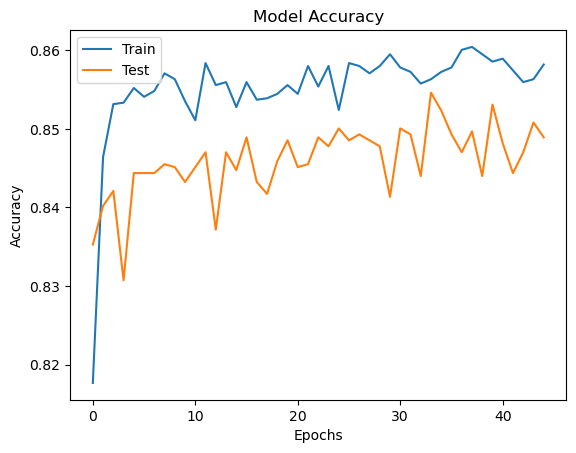

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


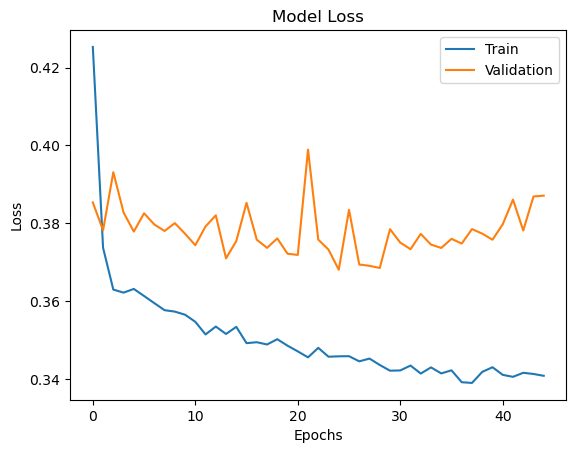

In [26]:
# Plot training and validation loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train', 'Validation'])
plt.show()


### makinng the prediction and evaluating the model

In [27]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)


63/63 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1509,   86],
       [ 206,  199]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
Score = accuracy_score(y_test, y_pred)

Score


0.854

In [34]:
#get the weights 
classifier.get_weights()

[array([[ 0.04258807, -0.3600029 ,  0.63234496,  1.60228   , -0.06724995,
          0.59321517, -0.0624337 , -0.00766187, -1.1049107 , -0.3364129 ,
          1.394259  ],
        [ 2.3173175 , -0.23313816,  1.491472  , -1.3843211 , -0.56074435,
         -2.13122   , -4.072526  , -3.6095533 , -1.4519864 ,  1.3398651 ,
         -0.02903699],
        [ 0.4391477 , -0.9663281 ,  0.54316574,  0.29924935,  0.1277037 ,
          1.3749729 ,  0.1253295 , -0.20389493, -0.02268955,  0.13712665,
          1.4122165 ],
        [-0.2457676 ,  0.09128313,  1.4608142 ,  1.2226278 ,  0.7186343 ,
          0.7649712 , -1.0618997 , -0.14991173, -2.3173687 , -0.28465357,
         -2.2851317 ],
        [-0.06912102, -1.0148675 ,  2.245884  ,  0.3737803 ,  2.826809  ,
          0.22201869, -0.52929133, -2.6340067 , -0.25554284, -3.4538546 ,
          0.45602924],
        [-0.30785915, -0.81098205, -0.4874333 ,  1.6996307 , -0.03423665,
          0.4318833 , -0.9711286 , -0.45795   , -0.5870164 , -0.1291842